# MNIST digit classification with 2 layer neural network

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

/home/sujit25/anaconda3/envs/ml_env/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("../data/MNIST_data", one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ../data/MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ../data/MNIST_data/t10k-lab

In [3]:
mnist_data.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
mnist_data.train.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [4]:
mnist_data.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
mnist_data.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
print(mnist_data.train.num_examples)
print(mnist_data.train.images.shape)

55000
(55000, 784)


In [15]:
print(mnist_data.test.num_examples)
print(mnist_data.test.images.shape)

10000
(10000, 784)


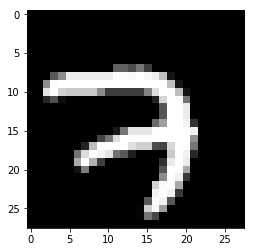

In [12]:
first_image = mnist_data.train.images[0].reshape(28,28)
plt.imshow(first_image, cmap='gist_gray')

In [32]:
batch_size = 50
learning_rate = 1e-4
num_epochs = 1000

# define computation graph

In [28]:
# placeholders
x = tf.placeholder(dtype= tf.float32, shape=(None, 784), name='x')
y_true = tf.placeholder(dtype= tf.float32, shape=(None, 10), name='true_labels')

# variables
w = tf.Variable(dtype=tf.float32, initial_value= tf.random_normal(shape=(784, 10), mean=0, stddev=1, name='weight'))
b = tf.Variable(dtype=tf.float32, initial_value = tf.zeros(shape=(10)), name='bias')

# linear mapping
y_ = tf.add(tf.matmul(x,w),b, name='predicted_labels')

# loss function - compute overall loss
cross_entropy_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits= y_))

# optimizer
train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy_loss)

# accuracy 
correct_predictions = tf.equal(tf.argmax(y_, axis=1), tf.argmax(y_true, axis=1)) 
accuracy = tf.reduce_mean(tf.cast(correct_predictions, dtype= tf.float32))


# execute computation graph

In [33]:
with tf.Session() as sess:
    init= tf.global_variables_initializer()
    # initialize global variables
    sess.run(init)
    
    cost_hist = []
    for epoch_num in range(num_epochs):
        epoch_cost = 0
        
        num_batches = int(mnist_data.train.num_examples/ batch_size)
        for batch_index in range(num_batches):
            batch_cost = 0
            batch_x, batch_y = mnist_data.train.next_batch(batch_size=batch_size)
            batch_cost,_ = sess.run([cross_entropy_loss, train], feed_dict = {x: batch_x, y_true: batch_y})
            epoch_cost += batch_cost
        
        cost_hist.append(epoch_cost)
        
        # compute train accuracy
        train_acc = sess.run(accuracy, feed_dict ={x : mnist_data.train.images, y_true: mnist_data.train.labels})
        
        # compute test accuracy
        test_acc = sess.run(accuracy, feed_dict ={x : mnist_data.test.images, y_true:mnist_data.test.labels})
        
        # print cost
        if epoch_num % 100 == 0:
            print("epoch: {}, cost: {}, train acc: {}, test acc: {}".format(epoch_num, epoch_cost, train_acc, test_acc))

epoch: 0, cost: 13286.844155311584, train acc: 0.1013636365532875, test acc: 0.10459999740123749
epoch: 100, cost: 3625.1112731695175, train acc: 0.4781818091869354, test acc: 0.4961000084877014
epoch: 200, cost: 2409.0363052487373, train acc: 0.61165452003479, test acc: 0.6258999705314636
epoch: 300, cost: 1903.0449202358723, train acc: 0.6740545630455017, test acc: 0.6877999901771545
epoch: 400, cost: 1622.6885451078415, train acc: 0.7136545181274414, test acc: 0.7250999808311462
epoch: 500, cost: 1442.5969487130642, train acc: 0.7392727136611938, test acc: 0.7490000128746033
epoch: 600, cost: 1315.3914491832256, train acc: 0.7584182024002075, test acc: 0.7663000226020813
epoch: 700, cost: 1221.4813680052757, train acc: 0.7738909125328064, test acc: 0.7811999917030334
epoch: 800, cost: 1147.6278727203608, train acc: 0.7846181988716125, test acc: 0.7924000024795532
epoch: 900, cost: 1088.4424168914557, train acc: 0.7940727472305298, test acc: 0.8029999732971191
